### C S 329E HW 4

## Decision Tree Classifier

## Srijeeta Biswas and Isabella Joseph

For this weeks homework we are going to explore ideas around decision tree implementation!  

We will implement some helper functions that would be necessary for a home-grown tree:
  - calc_entropy
  - calc_gini
  
and them test them out at given data splits. 
  
And finally, to perform predictive and descriptive analytics we use the [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#classification) class.

  
For this assignment, the stopping condition will be the depth of the tree. The impurity measure can be either `Entropy` or `Gini`

To test our tree built from the Decision Tree Classifier class, we will revisit our Melbourne housing data (that has been cleaned and pruned) and use the files:

   - `melb_tree_train.csv` for training the decision tree
   - `melb_tree_test.csv` for testing the decision tree

There are 10 features in these dataframes that we can use to describe and predict the housing "Type", which is 'h' house, 'u' duplex, or 't' townhome. 

In [8]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [9]:
# import the libraries!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import log2
from sklearn import tree # Yes, you get to use scikit-learn this assignment, but only when I say!
import graphviz
from sklearn.datasets import load_iris

## Q1 Load the Data
Load in the melb_tree_train.csv into a dataframe, and split that dataframe into `df_X` containing the features of the data set (everything but `Type`), and `s_y`, the series containing just the label column (just `Type`)

In [10]:
df = pd.read_csv('melb_tree_train.csv')
s_y = df['Type']
df_X = df.drop(['Type'], axis = 1)
df_X

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea
0,2,771000.0,13.8,2.0,1.0,1.0,0.0,99.0,1992.0,Bayside
1,3,700000.0,7.9,3.0,2.0,1.0,189.0,110.0,1990.0,Banyule
2,3,975000.0,12.1,3.0,2.0,1.0,277.0,109.0,1975.0,Glen Eira
3,3,1290000.0,8.0,3.0,1.0,1.0,618.0,132.0,1960.0,Moonee Valley
4,2,500000.0,4.2,2.0,1.0,1.0,0.0,86.0,2000.0,Melbourne
...,...,...,...,...,...,...,...,...,...,...
805,2,855000.0,11.4,2.0,1.0,1.0,158.0,106.0,1994.0,Glen Eira
806,2,696000.0,2.6,2.0,2.0,1.0,0.0,68.0,2008.0,Yarra
807,2,520000.0,9.9,2.0,1.0,1.0,0.0,82.0,2011.0,Moreland
808,3,815000.0,4.3,3.0,2.0,2.0,198.0,130.0,1990.0,Maribyrnong


## Q2 Define the entropy function
Implement a function `calc_entropy` that takes the labels series, s_y, as a parameter. Implement using the definition on p128 in the DM book and only use pandas and log2 libraries

In [11]:
def calc_entropy(labels_series):
    total = len(labels_series)
    t_total = 0
    u_total = 0
    h_total = 0
    for i in range(total):
        if labels_series[i] == 't':
            t_total += 1
        elif labels_series[i] == 'u':
            u_total+= 1
        elif labels_series[i] == 'h':
            h_total += 1
    t_frac = t_total/total
    u_frac = u_total/total
    h_frac = h_total/total
    
    entropy = -t_frac*log2(t_frac) - u_frac*log2(u_frac) - h_frac*log2(h_frac)
    return (entropy)

## Q3 Use the entropy function to
  - (a) Calculate the entropy of the entire training set
  - (b) Calculate the entropy of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [12]:
# calculating entropy of the entire training set
calc_entropy(s_y)

1.5825333114261775

In [28]:
# calculating entropy for landsize [0,200]
landsize_0_200 = df[df['Landsize'] <= 200]
s_y_0_200 = landsize_0_200['Type']

s_y_0_200.index = list(i for i in range(len(s_y_0_200)))

s_y_0_200
# calc_entropy(s_y_0_200)


0      t
1      t
2      u
3      t
4      u
      ..
376    t
377    u
378    t
379    t
380    h
Name: Type, Length: 381, dtype: object

In [36]:
# calculating entropy for landsize (200, 450]
temp = df[df['Landsize'] <= 450]
landsize_200_450 = temp[temp['Landsize'] > 200]
s_y_200_450 = landsize_200_450['Type']
s_y_200_450
s_y_200_450.index = list(i for i in range(len(s_y_200_450)))
s_y_200_450
# calc_entropy(s_y_200_450)


0      u
1      t
2      h
3      t
4      t
      ..
216    h
217    t
218    t
219    u
220    t
Name: Type, Length: 221, dtype: object

In [15]:
# calculating entropy for landsize [450, INF]
landsize_450_INF = df[df['Landsize'] > 450]
s_y_450_INF = landsize_450_INF['Type']
s_y_450_INF.index = list(i for i in range(len(s_y_450_INF)))
calc_entropy(s_y_450_INF)

1.09954792005911

## Q4 Define the Gini Index
Implement the function `calc_gini` that takes the labels series, s_y, as a parameter. Implement using the definition on p128 in the DM book.  Use only pandas library

In [16]:
def calc_gini(labels_series):
    total = len(labels_series)
    t_total = 0
    u_total = 0
    h_total = 0
    for i in range(total):
        if labels_series[i] == 't':
            t_total += 1
        elif labels_series[i] == 'u':
            u_total+= 1
        elif labels_series[i] == 'h':
            h_total += 1
    t_frac = t_total/total
    u_frac = u_total/total
    h_frac = h_total/total
    
    gini = 1-((t_frac**2) + (u_frac)**2 + (h_frac**2))
    return (gini)

## Q5 Use the Gini Index function to
  - (a) Calculate the Gini index of the entire training set
  - (b) Calculate the Gini index of the three partitions formed from 
    * Landsize $\in$ [0,200]
    * Landsize $\in$ (200,450]
    * Landsize $\in$ (450, $\infty$)

In [17]:
# entire training set
calc_gini(s_y)

0.6655601280292638

In [18]:
# landsize [0,200]
calc_gini(s_y_0_200)

0.5741211482422965

In [19]:
# landsize (200,450]
calc_gini(s_y_200_450)

0.6101021682602731

In [20]:
# landsize (450, INF)
calc_gini(s_y_450_INF)

0.43819341715976323

## Q6 Create a decision tree 
Using [scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree) create a multi class classifer for the data set using the Entropy impurity measure and a max depth of 3

Note that scikit-learn's algorithm doesn't handle categorical data, so that needs to be preprocessed using an one hot encoding.

Display the tree using `export_text` from sklearn.tree, and use that information to write some descriptive analytics on the classification of houses.  For extra fun, use the export_graphviz to draw the graph (see documentation on the [scikit-learn webpage](https://scikit-learn.org/stable/modules/tree.html#classification)).  If you are on a Windows system and get stuck reach out in the homework channel to see if anyone else could get it working for tips and tricks.  If enough people with Windows can't make the visualization, I won't count it toward the homework grade.

In [31]:
# # # using entropy impurity
# # # max depth is 3

#Make the x training set:
councilarea_ohe = pd.get_dummies(df_X['CouncilArea'])
df_sk = pd.concat([df_X,councilarea_ohe],axis = 1)
df_sk = df_sk.drop(['CouncilArea'],axis = 1)



#Make the tree:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)


decision_tree = decision_tree.fit(df_sk,s_y)
decision_tree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
cols = list(col for col in df_sk.columns)
tree_graph = tree.export_text(decision_tree, feature_names = cols,max_depth = 3,show_weights = True)
print(tree_graph)

|--- YearBuilt <= 1977.50
|   |--- Rooms <= 2.50
|   |   |--- Price <= 915000.00
|   |   |   |--- weights: [9.00, 7.00, 134.00] class: u
|   |   |--- Price >  915000.00
|   |   |   |--- weights: [24.00, 3.00, 5.00] class: h
|   |--- Rooms >  2.50
|   |   |--- Landsize <= 429.00
|   |   |   |--- weights: [47.00, 10.00, 12.00] class: h
|   |   |--- Landsize >  429.00
|   |   |   |--- weights: [114.00, 3.00, 2.00] class: h
|--- YearBuilt >  1977.50
|   |--- BuildingArea <= 104.31
|   |   |--- Landsize <= 76.00
|   |   |   |--- weights: [0.00, 8.00, 60.00] class: u
|   |   |--- Landsize >  76.00
|   |   |   |--- weights: [5.00, 41.00, 31.00] class: t
|   |--- BuildingArea >  104.31
|   |   |--- Landsize <= 391.00
|   |   |   |--- weights: [18.00, 194.00, 33.00] class: t
|   |   |--- Landsize >  391.00
|   |   |   |--- weights: [31.00, 15.00, 4.00] class: h



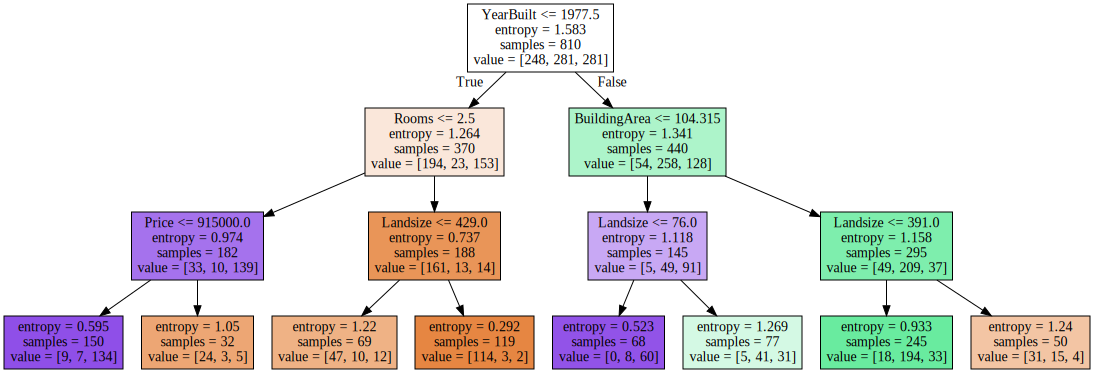

In [23]:
data=tree.export_graphviz(decision_tree, out_file=None,filled=True,feature_names=cols)
graph_new = graphviz.Source(data)
graph_new

Markdown explaination here

## Q7 Calculate the Accuracy and Display Learning Curve
Load in the test data.

Use the scikit-learn library to create decision trees with the following configurations

    - Vary the max depth from 2 to 15 with the Gini Index as the impurity measure
    - Vary the max depth from 2 to 15 with the Entropy as the impurity measure


Evaluate the accuracy of each decision tree with both the 
  - Training set
  - Test set

Display the results graphicaly, and offer an analysis of the trend (or if no trend present, offer a hypotheisis of why).  The max depth should be on the x-axis, and the error rate should be on the y-axis (see figure 3.23 in your DM textbook for a similar style of graph that uses leaf nodes instead of depth for the x-axis).

In [24]:
df_q7 = pd.read_csv('melb_tree_test.csv')
type_q7 = df_q7['Type']
df_q7 = df_q7.drop(['Type'],axis = 1)
council_ohe_q7 = pd.get_dummies(df_q7['CouncilArea'])
df_q7_final = pd.concat([df_q7,council_ohe_q7],axis = 1)
df_q7_final = df_q7_final.drop(['CouncilArea'],axis = 1)

max_dep_Gini = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
max_dep_Entropy = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

entropy_test = []
gini_test = []
entropy_training = []
gini_training = []

for gini in max_dep_Gini:
    
#     decision_tree_gini_test = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = gini)
#     decision_tree_gini_test = decision_tree_gini_test.fit(df_q7_final,type_q7)
    
    decision_tree_gini_training = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = gini)
    decision_tree_gini_training = decision_tree_gini_training.fit(df_sk,s_y)
    
    decision_tree_gini_test_predicted = decision_tree_gini_training.predict(df_q7_final)
    decision_tree_gini_train_predicted = decision_tree_gini_training.predict(df_sk)
    
    counter_gini_test = 0
    counter_gini_train = 0
    
    for x in range(len(type_q7)):
        if type_q7[x] == decision_tree_gini_test_predicted[x]:
            counter_gini_test += 1
            
    gini_test_accuracy = counter_gini_test/len(type_q7)
    gini_test_error = 1-gini_test_accuracy
    gini_test.append(gini_test_error)
            
    for y in range(len(s_y)):
        if s_y[y] == decision_tree_gini_train_predicted[y]:
            counter_gini_train += 1
    
    gini_train_accuracy = counter_gini_train/len(s_y)
    gini_train_error = 1-gini_train_accuracy
    gini_training.append(gini_train_error)
    
    
for entropy in max_dep_Gini:
    
#     decision_tree_entropy_test = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = entropy)
#     decision_tree_entropy_test = decision_tree_entropy_test.fit(df_q7_final,type_q7)
    
    decision_tree_entropy_training = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = entropy)
    decision_tree_entropy_training = decision_tree_entropy_training.fit(df_sk,s_y)
    
    decision_tree_entropy_test_predicted = decision_tree_entropy_training.predict(df_q7_final)
    decision_tree_entropy_train_predicted = decision_tree_entropy_training.predict(df_sk)
    
    counter_entropy_test = 0
    counter_entropy_train = 0
    
    for x in range(len(type_q7)):
        if type_q7[x] == decision_tree_entropy_test_predicted[x]:
            counter_entropy_test += 1
            
    entropy_test_accuracy = counter_entropy_test/len(type_q7)
    entropy_test_error = 1-entropy_test_accuracy
    entropy_test.append(entropy_test_error)
            
    for y in range(len(s_y)):
        if s_y[y] == decision_tree_entropy_train_predicted[y]:
            counter_entropy_train += 1
    
    entropy_train_accuracy = counter_entropy_train/len(s_y)
    entropy_train_error = 1-entropy_train_accuracy
    entropy_training.append(entropy_train_error)


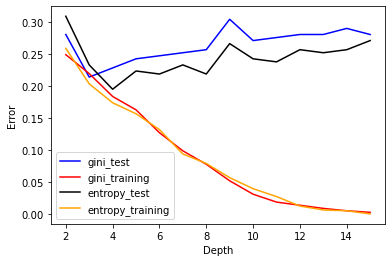

In [25]:
x = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

plt.plot(x,gini_test,color='blue',label = 'gini_test')
plt.plot(x,gini_training,color='red',label = 'gini_training')
plt.plot(x,entropy_test,color='black',label = 'entropy_test')
plt.plot(x,entropy_training,color='orange',label = 'entropy_training')


plt.xlabel('Depth')
plt.ylabel('Error')

plt.legend()

In [26]:
#Analysis of graph
#As maximum depth of tree increases, error rate in the training set decreases
#As maximum depth of tree increases, error rate in the test set increases slightly. 
#The optimal depth appears to be about 3-4